# DSCI 503 - Homework 04
### Nathan Stratford

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [4]:
x = [10, 16, 26, 12, 17, 22, 14, 12, 21, 16 ]
n = len(x)
mean = np.sum(x) / n
diff = [item - mean for item in x]
squared_diff = [d**2 for d in diff]
sample_variance = np.sum(squared_diff) / (n - 1)
print(f"Sample Mean:     {mean:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")      

Sample Mean:     16.60
Sample Variance: 25.60


## Problem 2: Scoring a Regression Model

In [6]:
def find_sse(true_y, pred_y):
    true_np_array = np.array(true_y)
    pred_np_array = np.array(pred_y)
    result_array = true_np_array - pred_np_array
    return np.sum(result_array ** 2)
    

In [7]:
true_y = [22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2]
pred_1 = [21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9]
pred_2 = [20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4]
print(f"Model 1 SSE: {find_sse(true_y, pred_1):.2f}")
print(f"Model 2 SSE: {find_sse(true_y, pred_2):.2f}")   

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [9]:
def find_accuracy(true_y, pred_y):
    np_true_y = np.array(true_y)
    np_pred_y = np.array(pred_y)
    return np.sum(np_true_y == np_pred_y) / len(true_y)

In [10]:
true_diag = ['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N']
pred_diag = ['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N']
print("Model Accuracy: " + str(find_accuracy(true_diag, pred_diag)))

Model Accuracy: 0.75


In [11]:
true_labels = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat']
pred_labels = ['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat']
print("Model Accuracy: " + str(find_accuracy(true_labels, pred_labels)))

Model Accuracy: 0.875


## Problem 4: Classification Report

In [13]:
def classification_report(true_y, pred_y):
    np_true_y = np.array(true_y)
    np_pred_y = np.array(pred_y)
    classes = np.unique(true_y)
    negative_class = classes[0]
    positive_class = classes[1]
    
    accuracy = find_accuracy(true_y, pred_y)
    TP = np.sum((np_true_y == positive_class) & (np_pred_y == positive_class))
    FP = np.sum((np_true_y == negative_class) & (np_pred_y == positive_class))
    TN = np.sum((np_true_y == negative_class) & (np_pred_y == negative_class))
    FN = np.sum((np_true_y == positive_class) & (np_pred_y == negative_class))

    positive_precision = TP / (TP + FP)
    positive_recall = TP / (TP + FN) 
    negative_precision = TN / (TN + FN)
    negative_recall = TN / (TN + FP)

    print(f"Positive Class: {positive_class}")
    print(f"Negative Class: {negative_class}")
    print()
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Positive Precision: {positive_precision:.4f}")
    print(f"Positive Recall: {positive_recall:.4f}")
    print(f"Negative Precision: {negative_precision:.4f}")
    print(f"Negative Recall: {negative_recall:.4f}")

In [14]:
classification_report(true_diag, pred_diag)


Positive Class: P
Negative Class: N

Accuracy: 0.7500
Positive Precision: 0.5556
Positive Recall: 0.8333
Negative Precision: 0.9091
Negative Recall: 0.7143


## Problem 5: Transformation of Random Variables

In [16]:
import numpy as np

np.random.seed(1)

X = np.random.normal(0, 0.4, 25000)
Y = np.exp(X)
mean_X = np.mean(X)
std_X = np.std(X, ddof=1)  
mean_Y = np.mean(Y)
std_Y = np.std(Y, ddof=1)  

print(f"Sample Mean of X:     {mean_X:.4f}")
print(f"Sample Std Dev of X:  {std_X:.4f}")
print(f"Sample Mean of Y:     {mean_Y:.4f}")
print(f"Sample Std Dev of Y:  {std_Y:.4f}")

Sample Mean of X:     0.0025
Sample Std Dev of X:  0.4002
Sample Mean of Y:     1.0862
Sample Std Dev of Y:  0.4537


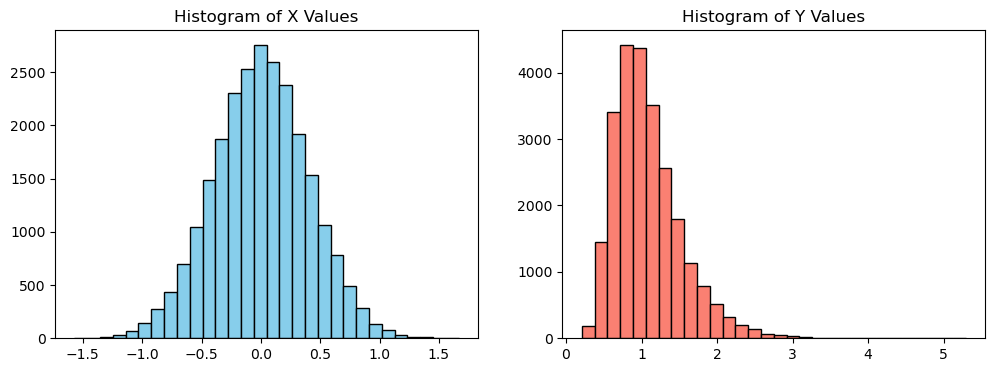

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(X, bins=30, edgecolor='black', color='skyblue')
plt.title("Histogram of X Values")

plt.subplot(1, 2, 2)
plt.hist(Y, bins=30, edgecolor='black', color='salmon')  
plt.title("Histogram of Y Values")

plt.show()

In [18]:
prob_less_than_0_5 = np.mean(Y < 0.5)
prob_less_than_1_0 = np.mean(Y < 1.0)
prob_less_than_2_0 = np.mean(Y < 2.0)

print(f"Probability that Y is less than 0.5: {prob_less_than_0_5:.4f}")
print(f"Probability that Y is less than 1.0: {prob_less_than_1_0:.4f}")
print(f"Probability that Y is less than 2.0: {prob_less_than_2_0:.4f}")

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

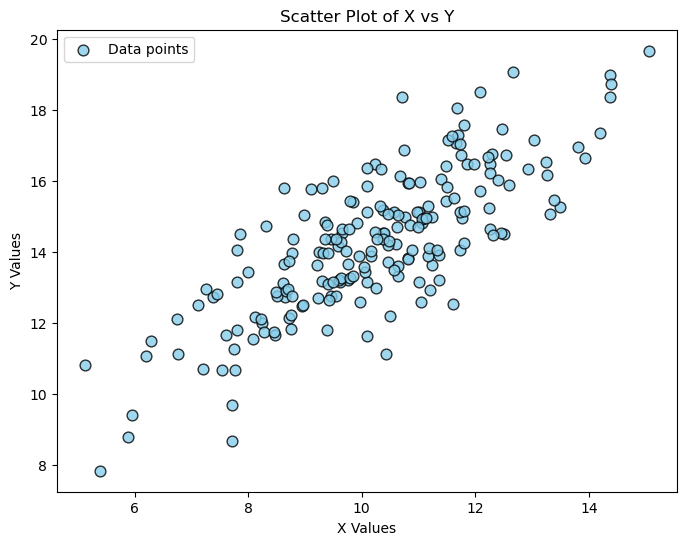

In [20]:
import numpy as np

np.random.seed(1)

x_vals = np.random.normal(10, 2, 200)
errors = np.random.normal(0, 1.2, 200)

y_vals = 5.1 + (0.9 * x_vals) + errors

plt.figure(figsize=[8, 6]) 
plt.scatter(x_vals, y_vals, s=60, alpha=0.8, edgecolors='black', color='skyblue', label='Data points')  # Plot with point size, alpha, and border


plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.show()

In [21]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)

top = np.sum(diff_x * diff_y)

bottom = np.sqrt(np.sum(diff_x**2) * np.sum(diff_y**2))
r = top / bottom

# Print the result, rounded to four decimal places
print(f"Correlation between X and Y: {r:.4f}")

Correlation between X and Y: 0.7861


## Problem 7 Relationship between Life Expectancy and Per Capita GDP

In [23]:
import pandas as pd 
df = pd.read_csv('gapminder_data.txt', sep='\t') 
country = df.country.values 
year = df.year.values 
continent = df.continent.values 
population = df.population.values 
life_exp = df.life_exp.values 
pcgdp = df.gdp_per_cap.values 
gini = df.gini.values 
df = None

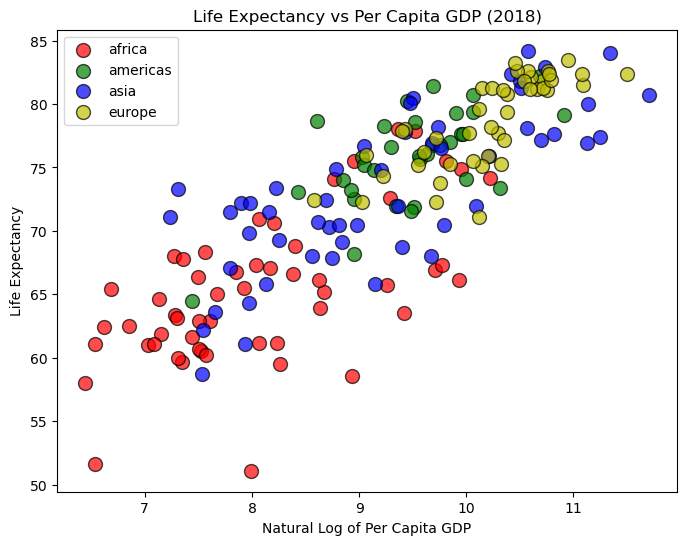

In [24]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['r', 'g', 'b', 'y']
plt.figure(figsize=[8, 6]) 
for i, cont in enumerate(continent_list):
    sel = (continent == cont) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], 
        s=100, alpha=0.7, edgecolors='black', color=color_list[i], label=cont)
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')

plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

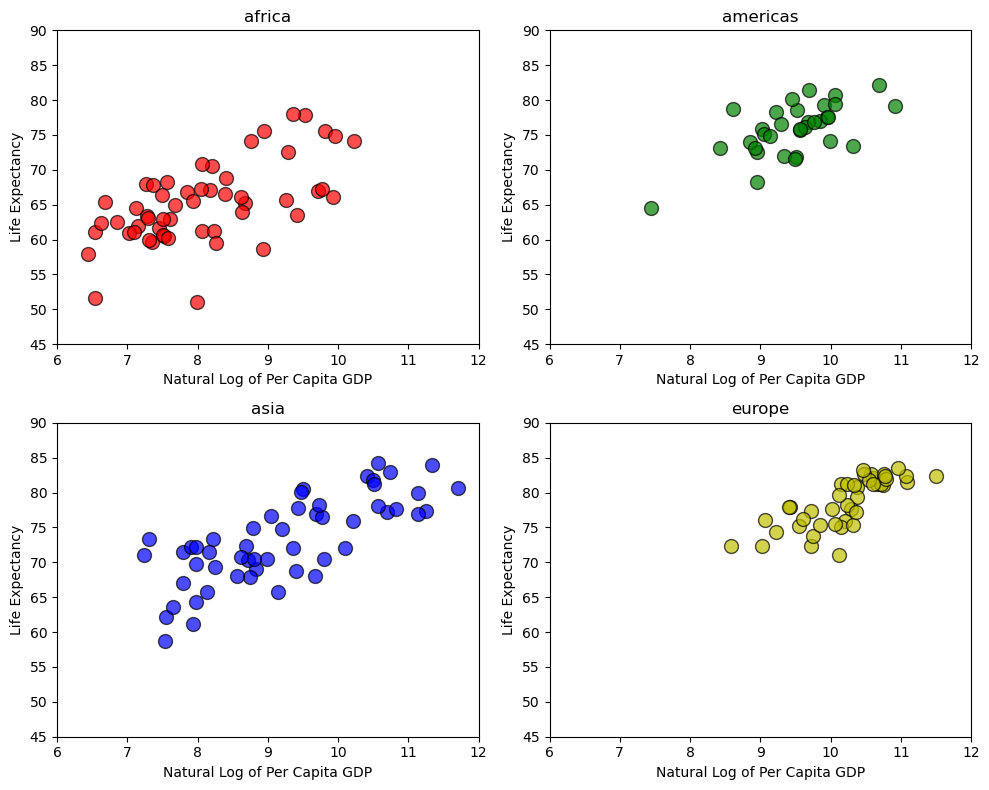

In [25]:
plt.figure(figsize=[10, 8])
for i, cont in enumerate(continent_list):

    plt.subplot(2, 2, i + 1)
    sel = (continent == cont) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]), life_exp[sel], 
        s=100, alpha=0.7, edgecolors='black', color=color_list[i], label=cont)

    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(cont)

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

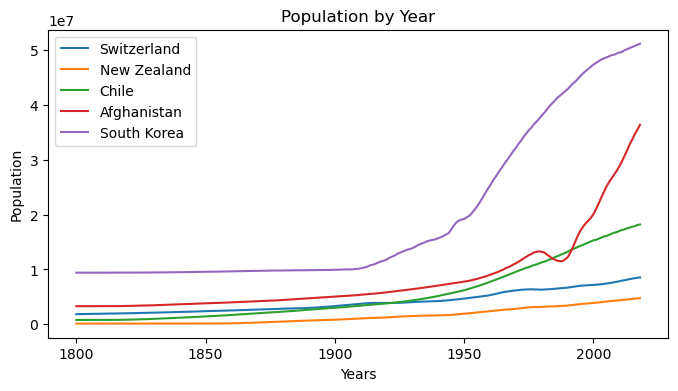

In [27]:
selected_countries = ['Switzerland', 'New Zealand', 'Chile', 'Afghanistan', 'South Korea']
plt.figure(figsize=(8, 4))

for country_name in selected_countries:
    country_years = []
    country_population = []
    
    for i in range(len(country)):
        if country[i] == country_name:
            country_years.append(year[i])         
            country_population.append(population[i]) 
    plt.plot(country_years, country_population, label=country_name)

plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population by Year")
plt.legend()
plt.show()



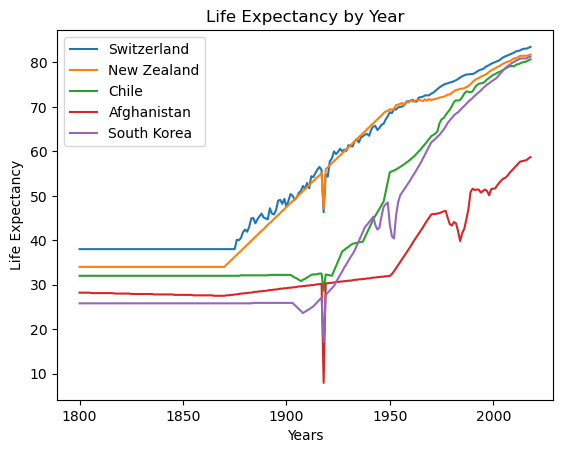

In [28]:
for country_name in selected_countries:
    country_years = []
    country_life_exp = []
    
    for i in range(len(country)):
        if country[i] == country_name:
            country_years.append(year[i])         
            country_life_exp.append(life_exp[i]) 
    plt.plot(country_years, country_life_exp, label=country_name)

plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy by Year")
plt.legend()
plt.show()
